In [4]:
# Using a movie ratings dataset, build a model to predict how a user might rate a movie they haven’t seen yet. Preprocess the data, use collaborative filtering or a regression model, and evaluate its performance.

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
# import scikit-learn as sklearn
# from sklearn.metrics import LinearRegression()


In [6]:
df = pd.read_csv(r"C:\Users\Public\Downloads\Data Science Internship ArchTechnologies\Github_Tasks_2nd_Month\IMDB_Project_Task4\IMDB-Movie-Data.csv")
df.head(10)

Rank                    Title                       Genre  \
0     1  Guardians of the Galaxy     Action,Adventure,Sci-Fi   
1     2               Prometheus    Adventure,Mystery,Sci-Fi   
2     3                    Split             Horror,Thriller   
3     4                     Sing     Animation,Comedy,Family   
4     5            Suicide Squad    Action,Adventure,Fantasy   
5     6           The Great Wall    Action,Adventure,Fantasy   
6     7               La La Land          Comedy,Drama,Music   
7     8                 Mindhorn                      Comedy   
8     9       The Lost City of Z  Action,Adventure,Biography   
9    10               Passengers     Adventure,Drama,Romance   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   
5  European mercenaries searching for black powde...           Yimou Zhang   
6  A jazz pianist falls for an aspiring actress i...       Damien Chazelle   
7  A has-been actor best known for playing the ti...            Sean Foley   
8  A true-life drama, centering on British explor...            James Gray   
9  A spacecraft traveling to a distant colony pla...         Morten Tyldum   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012                124   
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016                117   
3  Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016                108   
4  Will Smith, Jared Leto, Margot Robbie, Viola D...  2016                123   
5      Matt Damon, Tian Jing, Willem Dafoe, Andy Lau  2016                103   
6  Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....  2016                128   
7  Essie Davis, Andrea Riseborough, Julian Barrat...  2016                 89   
8  Charlie Hunnam, Robert Pattinson, Sienna Mille...  2016                141   
9  Jennifer Lawrence, Chris Pratt, Michael Sheen,...  2016                116   

   Rating   Votes  Revenue (Millions)  Metascore  
0     8.1  757074              333.13       76.0  
1     7.0  485820              126.46       65.0  
2     7.3  157606              138.12       62.0  
3     7.2   60545              270.32       59.0  
4     6.2  393727              325.02       40.0  
5     6.1   56036               45.13       42.0  
6     8.3  258682              151.06       93.0  
7     6.4    2490                 NaN       71.0  
8     7.1    7188                8.01       78.0  
9     7.0  192177              100.01       41.0

In [7]:
df.tail()

Rank                   Title                  Genre  \
995   996    Secret in Their Eyes    Crime,Drama,Mystery   
996   997         Hostel: Part II                 Horror   
997   998  Step Up 2: The Streets    Drama,Music,Romance   
998   999            Search Party       Adventure,Comedy   
999  1000              Nine Lives  Comedy,Family,Fantasy   

                                           Description          Director  \
995  A tight-knit team of rising investigators, alo...         Billy Ray   
996  Three American college students studying abroa...          Eli Roth   
997  Romantic sparks occur between two dance studen...        Jon M. Chu   
998  A pair of friends embark on a mission to reuni...    Scot Armstrong   
999  A stuffy businessman finds himself trapped ins...  Barry Sonnenfeld   

                                                Actors  Year  \
995  Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...  2015   
996  Lauren German, Heather Matarazzo, Bijou Philli...  2007   
997  Robert Hoffman, Briana Evigan, Cassie Ventura,...  2008   
998  Adam Pally, T.J. Miller, Thomas Middleditch,Sh...  2014   
999  Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...  2016   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
995                111     6.2  27585                 NaN       45.0  
996                 94     5.5  73152               17.54       46.0  
997                 98     6.2  70699               58.01       50.0  
998                 93     5.6   4881                 NaN       22.0  
999                 87     5.3  12435               19.64       11.0

In [8]:
df.shape


(1000, 12)

In [9]:
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 1000
Number of Columns: 12


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [11]:
print("Is there are any missing values:",df.isnull().values.any())

Is there are any missing values: True


In [12]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

<Axes: >

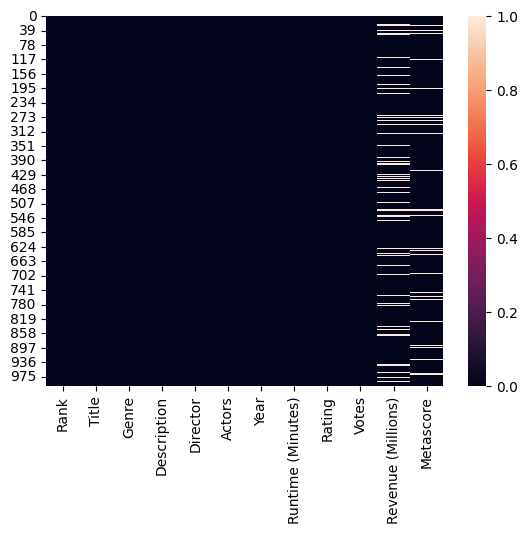

In [13]:
sns.heatmap(df.isnull())

In [14]:
missing_percent = df.isnull().sum() * 100 /len(df)
missing_percent

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

### Here are the 12.8% missing values in Revenue Column & 6.4% missing values in Metascore

In [15]:
df_n = df.dropna(axis=0)
df_n.head()

Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012                124   
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016                117   
3  Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016                108   
4  Will Smith, Jared Leto, Margot Robbie, Viola D...  2016                123   

   Rating   Votes  Revenue (Millions)  Metascore  
0     8.1  757074              333.13       76.0  
1     7.0  485820              126.46       65.0  
2     7.3  157606              138.12       62.0  
3     7.2   60545              270.32       59.0  
4     6.2  393727              325.02       40.0

In [16]:
print("Is now there are any missing values:",df_n.isnull().values.any())

Is now there are any missing values: False


<Axes: >

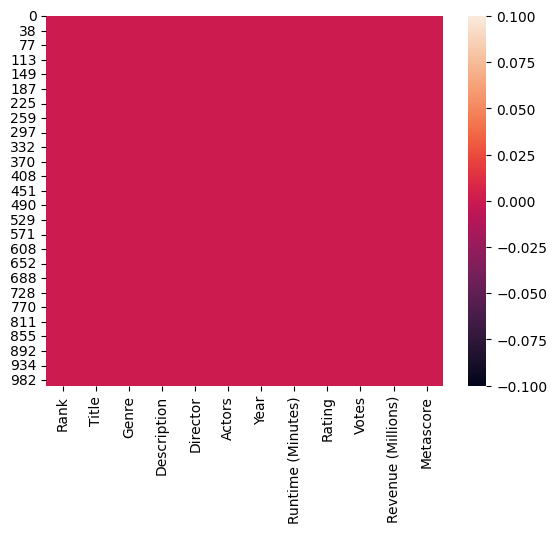

In [17]:
sns.heatmap(df_n.isnull())

In [18]:
df_n.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
993    False
994    False
996    False
997    False
999    False
Length: 838, dtype: bool

### There are not any duplicated so without any changings going ahead

In [19]:
df_n.describe().style.background_gradient(cmap='viridis')


In [20]:
df_n.describe(include='all').style.background_gradient(cmap='viridis')

In [21]:
df_n.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [22]:
df_n[df_n['Runtime (Minutes)']>= 180]

Rank                    Title                   Genre  \
82     83  The Wolf of Wall Street  Biography,Comedy,Crime   
88     89        The Hateful Eight     Crime,Drama,Mystery   
311   312           La vie d'Adèle           Drama,Romance   

                                           Description             Director  \
82   Based on the true story of Jordan Belfort, fro...      Martin Scorsese   
88   In the dead of a Wyoming winter, a bounty hunt...    Quentin Tarantino   
311  Adèle's life is changed when she meets Emma, a...  Abdellatif Kechiche   

                                                Actors  Year  \
82   Leonardo DiCaprio, Jonah Hill, Margot Robbie,M...  2013   
88   Samuel L. Jackson, Kurt Russell, Jennifer Jaso...  2015   
311  Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...  2013   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
82                 180     8.2  865134              116.87       75.0  
88                 187     7.8  341170               54.12       68.0  
311                180     7.8  103150                2.20       88.0

In [23]:
df_n[df_n['Runtime (Minutes)'] >= 180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
Name: Title, dtype: object

In [24]:
df_n.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [25]:
# In which year was the Average Highest Votings

df_n.groupby('Year')['Votes'].mean().sort_values(ascending = False)

Year
2012    290861.483871
2006    277232.219512
2009    267180.577778
2008    266580.145833
2007    266530.704545
2010    261082.929825
2011    259254.736842
2013    225531.892857
2014    211926.881720
2015    129512.651376
2016     68437.823232
Name: Votes, dtype: float64

Text(0.5, 1.0, 'Voting By Year')

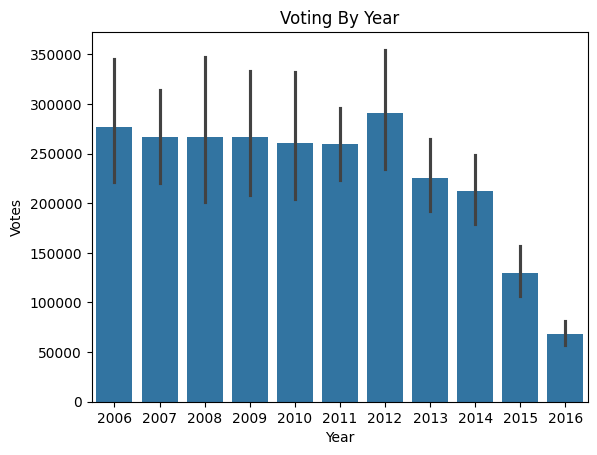

In [26]:
sns.barplot(x='Year', y='Votes', data = df_n)
plt.title("Voting By Year")

In [27]:
# In which Year there was the higheest average revenue

df_n.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending = False)

Year
2009    115.742000
2012    110.103065
2010    105.081579
2008     97.525417
2011     93.703333
2007     93.074091
2013     88.084643
2006     87.255610
2014     85.433656
2015     80.725596
2016     55.566111
Name: Revenue (Millions), dtype: float64

Text(0.5, 1.0, 'Revenue By Year')

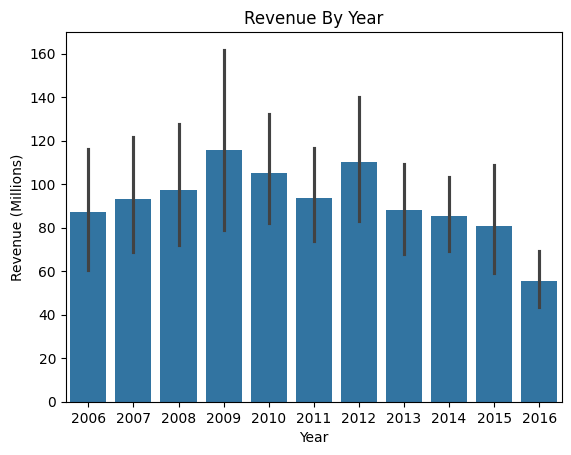

In [28]:
sns.barplot(x='Year', y='Revenue (Millions)', data = df_n)
plt.title("Revenue By Year")

In [29]:
# Average Rating for each Director

df_n.groupby('Director')['Rating'].mean().sort_values(ascending = False)

Director
Christopher Nolan                   8.68
Olivier Nakache                     8.60
Makoto Shinkai                      8.60
Florian Henckel von Donnersmarck    8.50
Aamir Khan                          8.50
                                    ... 
Sam Taylor-Johnson                  4.10
Joey Curtis                         4.00
George Nolfi                        3.90
James Wong                          2.70
Jason Friedberg                     1.90
Name: Rating, Length: 524, dtype: float64

In [30]:
# Top 5 Movie Titles & Runtime

top_10 = df_n.nlargest(10, 'Runtime (Minutes)')[['Title', 'Runtime (Minutes)']]
top_10

Title  Runtime (Minutes)
88                          The Hateful Eight                187
82                    The Wolf of Wall Street                180
311                            La vie d'Adèle                180
267                               Cloud Atlas                172
430                                  3 Idiots                170
36                               Interstellar                169
75   Pirates of the Caribbean: At World's End                169
271         The Hobbit: An Unexpected Journey                169
425       The Curious Case of Benjamin Button                166
126           Transformers: Age of Extinction                165

In [31]:
# top_5 = print(top_5.to_string(index=False))


In [75]:
sns.barplot(x=top_10['Runtime (Minutes)'],y=top_10['Title'], color='gold')
plt.title('Top 10 Lengthly Movies')

KeyError: 'Runtime (Minutes)'

In [33]:
# Display number of Movies by Year

df_n['Year'].value_counts()

Year
2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2008     48
2009     45
2007     44
2006     41
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Movies Per Year')

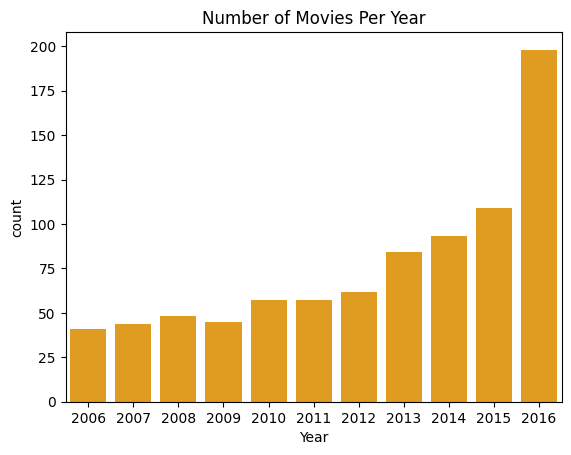

In [34]:
sns.countplot(x='Year', color = 'orange', data= df_n)
plt.title("Number of Movies Per Year")


In [35]:
# Most Popular movie title as highest Revenue

df_n[df_n['Revenue (Millions)'].max() == df_n['Revenue (Millions)']]['Title']


50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

In [36]:
# Display Top 10 Highest Rated Movie Titles And its Directors

top_10 = df_n.nlargest(10,'Rating')[['Title','Rating','Director']].set_index('Title')
top_10

Rating                          Director
Title                                                          
The Dark Knight           9.0                 Christopher Nolan
Inception                 8.8                 Christopher Nolan
Interstellar              8.6                 Christopher Nolan
Kimi no na wa             8.6                    Makoto Shinkai
The Intouchables          8.6                   Olivier Nakache
The Prestige              8.5                 Christopher Nolan
The Departed              8.5                   Martin Scorsese
The Dark Knight Rises     8.5                 Christopher Nolan
Whiplash                  8.5                   Damien Chazelle
The Lives of Others       8.5  Florian Henckel von Donnersmarck

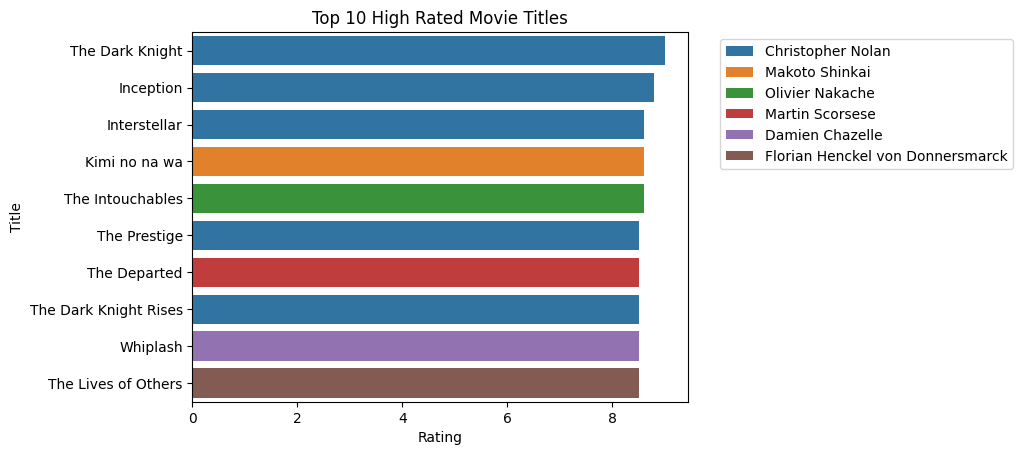

In [37]:
sns.barplot(x='Rating',y=top_10.index, data=top_10, hue='Director')
plt.title("Top 10 High Rated Movie Titles") 
plt.legend(bbox_to_anchor=(1.05, 1), loc =2)
plt.show()

### As we see here are the 5 Movies Director is Christopher Nolan and also Top 3 Movies directed by him.

In [38]:
top10_ = df_n.nlargest(10, 'Revenue (Millions)')[['Title', 'Revenue (Millions)']].set_index('Title')

In [39]:
top10_

Revenue (Millions)
Title                                                         
Star Wars: Episode VII - The Force Awakens              936.63
Avatar                                                  760.51
Jurassic World                                          652.18
The Avengers                                            623.28
The Dark Knight                                         533.32
Rogue One                                               532.17
Finding Dory                                            486.29
Avengers: Age of Ultron                                 458.99
The Dark Knight Rises                                   448.13
The Hunger Games: Catching Fire                         424.65

Text(0.5, 1.0, 'Top 10 Highest Revenue Movie Titles')

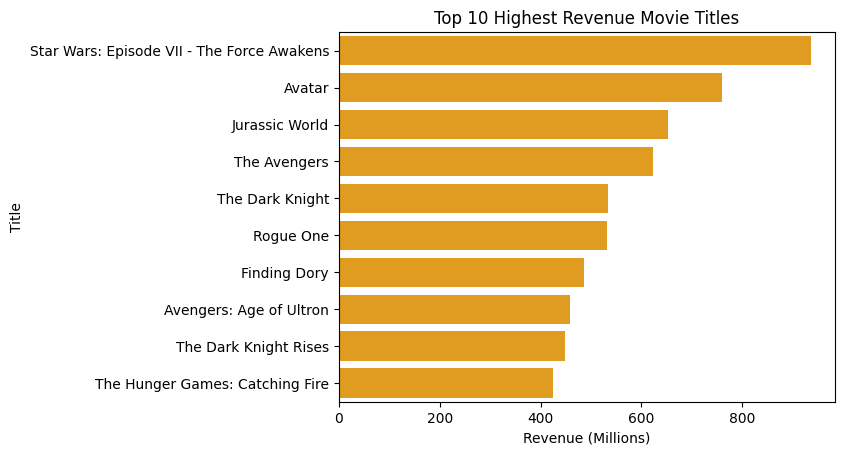

In [40]:
sns.barplot(x='Revenue (Millions)', y=top10_.index, color = 'orange', data = top10_)
plt.title("Top 10 Highest Revenue Movie Titles")

In [41]:
# Average Rating Movies Year-wise

df_n.groupby('Year')['Rating'].mean().sort_values(ascending=False)

Year
2006    7.143902
2007    7.140909
2011    6.945614
2012    6.933871
2009    6.911111
2010    6.894737
2013    6.832143
2014    6.822581
2008    6.708333
2015    6.674312
2016    6.644444
Name: Rating, dtype: float64

In [42]:
# plt.figure(figsize=(10,5))
# sns.barplot(df_n.index,df_n['Rating'])
# plt.show()

<Axes: xlabel='Rating', ylabel='Revenue (Millions)'>

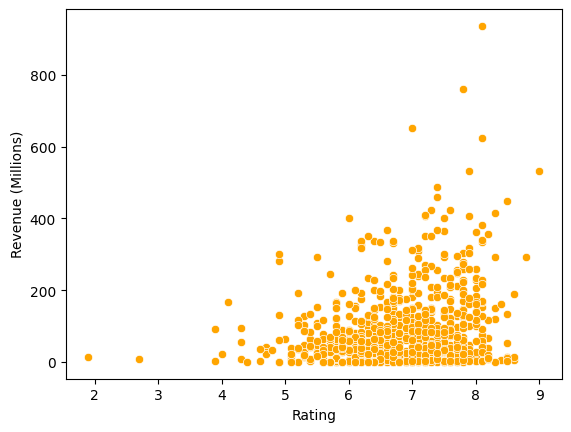

In [43]:
# Does Rating affect the revenue

sns.scatterplot(x='Rating',y='Revenue (Millions)',color='orange', data=df_n)

### Yes, Rating affects the revenue

In [44]:
# Classify Movies Based on Ratings [Excellent, Good, Average Or Bad]

def rating(rating):
    if rating>=7.5:
        return 'Excellent'
    elif rating>=6.5:
        return 'Good'
    elif rating>=4.5:
        return 'Average'
    else:
        return 'Bad'
    

df_1 = df_n['rating_category']=df_n['Rating'].apply(rating)

In [45]:
df_1.head(10)

0     Excellent
1          Good
2          Good
3          Good
4       Average
5       Average
6     Excellent
8          Good
9          Good
10    Excellent
Name: Rating, dtype: object

In [46]:
df_n.head()

Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012                124   
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016                117   
3  Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016                108   
4  Will Smith, Jared Leto, Margot Robbie, Viola D...  2016                123   

   Rating   Votes  Revenue (Millions)  Metascore rating_category  
0     8.1  757074              333.13       76.0       Excellent  
1     7.0  485820              126.46       65.0            Good  
2     7.3  157606              138.12       62.0            Good  
3     7.2   60545              270.32       59.0            Good  
4     6.2  393727              325.02       40.0         Average

In [47]:
df['Genre'].dtype

dtype('O')

In [48]:
# Number of Action Movies

list1=[]
for value in df['Genre']:
    list1.append(value.split(','))

In [49]:
df['temp']=list1


In [50]:
len(df[df['Genre'].str.contains('Action',case=False)])


303

In [51]:
# Uniques Values by Genre 

df['Genre']


0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object

In [52]:
# How many films by each genre made

list1=[]

for value in df['Genre']:
    list1.append(value.split(','))

In [53]:
list1

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Comedy'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Crime', 'Drama', 'Horror'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Horror', 'Thriller'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure

In [54]:
d1 = []

for item in list1:
    for item1 in item:
        d1.append(item1)

In [55]:
d1

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Comedy',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Crime',
 'Drama',
 'Horror',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Horror',
 'Thriller',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 

In [56]:
uni_list = []
for item in d1:
    if item not in uni_list:
        uni_list.append(item1)
    

In [57]:
len(uni_list)

2454

In [58]:
uni_list

['Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fa

In [59]:
# How many films made by each genre

d1 = []

for item in list1:
    for item1 in item:
        d1.append(item1)

In [60]:
from collections import Counter

Counter(d1)

Counter({'Drama': 513,
         'Action': 303,
         'Comedy': 279,
         'Adventure': 259,
         'Thriller': 195,
         'Crime': 150,
         'Romance': 141,
         'Sci-Fi': 120,
         'Horror': 119,
         'Mystery': 106,
         'Fantasy': 101,
         'Biography': 81,
         'Family': 51,
         'Animation': 49,
         'History': 29,
         'Sport': 18,
         'Music': 16,
         'War': 13,
         'Western': 7,
         'Musical': 5})

In [61]:
# genre=input("Enter the Genre you want to count: ").title()
# count=0
# for value in df['temp']:
#     if genre in value:
#         count=count+1
# print("Total Count is",count)

## Movie Rating Prediction - Collaborative Filtering (SVD)
This notebook implements SVD-based collaborative filtering to predict user ratings.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### Load Dataset
Ensure that your dataset contains columns: `Rank`, `Title`, and `Rating`.

In [63]:
df = pd.read_csv(r'C:\Users\Public\Downloads\Data Science Internship ArchTechnologies\Github_Tasks_2nd_Month\IMDB_Project_Task4\IMDB-Movie-Data.csv')  # You will replace this with your real dataset
df.head()

Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012                124   
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016                117   
3  Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016                108   
4  Will Smith, Jared Leto, Margot Robbie, Viola D...  2016                123   

   Rating   Votes  Revenue (Millions)  Metascore  
0     8.1  757074              333.13       76.0  
1     7.0  485820              126.46       65.0  
2     7.3  157606              138.12       62.0  
3     7.2   60545              270.32       59.0  
4     6.2  393727              325.02       40.0

### Create User-Item Matrix

In [68]:
user_item = df.pivot_table(values='Rating', index='Rank', columns='Title').fillna(0)
user_item.shape

(1000, 999)

### Train-Test Split

In [65]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
train.head()

Rank                Title                   Genre  \
29     30     Assassin's Creed  Action,Adventure,Drama   
535   536       Need for Speed      Action,Crime,Drama   
695   696  Hachi: A Dog's Tale            Drama,Family   
557   558       Dracula Untold    Action,Drama,Fantasy   
836   837          Bacalaureat             Crime,Drama   

                                           Description         Director  \
29   When Callum Lynch explores the memories of his...    Justin Kurzel   
535  Fresh from prison, a street racer who was fram...      Scott Waugh   
695  A college professor's bond with the abandoned ...  Lasse Hallström   
557  As his kingdom is being threatened by the Turk...       Gary Shore   
836  A film about compromises and the implications ...  Cristian Mungiu   

                                                Actors  Year  \
29   Michael Fassbender, Marion Cotillard, Jeremy I...  2016   
535  Aaron Paul, Dominic Cooper, Imogen Poots, Scot...  2014   
695  Richard Gere, Joan Allen, Cary-Hiroyuki Tagawa...  2009   
557  Luke Evans, Dominic Cooper, Sarah Gadon, Art P...  2014   
836  Adrian Titieni, Maria-Victoria Dragus, Lia Bug...  2016   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
29                 115     5.9  112813               54.65       36.0  
535                132     6.5  143389               43.57       39.0  
695                 93     8.1  177602                 NaN       61.0  
557                 92     6.3  148504               55.94       40.0  
836                128     7.5    5531                0.13       84.0

### Train SVD Model

In [66]:
svd = TruncatedSVD(n_components=50, random_state=42)
matrix = user_item.values
svd_matrix = svd.fit_transform(matrix)
reconstructed = np.dot(svd_matrix, svd.components_)
pred_df = pd.DataFrame(reconstructed, index=user_item.index, columns=user_item.columns)
pred_df.head()

Title  (500) Days of Summer  10 Cloverfield Lane  10 Years  12 Years a Slave  \
Rank                                                                           
1                 -0.081521            -0.007360  0.012563         -0.334600   
2                  0.038342             0.012621  0.000822         -0.007438   
3                  0.089277            -0.013904  0.002699          0.051900   
4                  0.020032            -0.012051  0.007437         -0.003958   
5                 -0.000134             0.006803  0.000387          0.018852   

Title  127 Hours  13 Hours      1408  17 Again      2012  20th Century Women  \
Rank                                                                           
1      -0.058000 -0.044879 -0.013686  0.021119  0.010392           -0.012748   
2       0.022024  0.009522  0.004439  0.001787  0.002677           -0.012275   
3      -0.013470 -0.022129 -0.011215  0.002462  0.000670           -0.005029   
4       0.001099 -0.023507  0.001447 -0.001349 -0.001050           -0.008304   
5      -0.004466 -0.000506 -0.000665  0.000409 -0.000151            0.000867   

Title  ...  You Don't Mess with the Zohan  Your Highness     Youth  \
Rank   ...                                                           
1      ...                       0.005137      -0.001173  0.010272   
2      ...                       0.000205       0.001138  0.012760   
3      ...                       0.000612      -0.000394  0.049860   
4      ...                      -0.000409      -0.001054  0.055841   
5      ...                      -0.000090       0.000179 -0.000126   

Title  Zack and Miri Make a Porno  Zero Dark Thirty    Zipper    Zodiac  \
Rank                                                                      
1                        0.059611         -0.097259  0.003924 -0.035071   
2                       -0.010660         -0.012428 -0.000015 -0.013626   
3                        0.005390          0.034103 -0.000667 -0.075360   
4                        0.005801          0.010177 -0.003327 -0.072675   
5                       -0.002084         -0.006779  0.000116  0.010362   

Title  Zombieland  Zoolander 2  Zootopia  
Rank                                      
1       -0.117865     0.000497  0.166377  
2       -0.012469     0.000018  0.092356  
3        0.030648     0.000110  0.074724  
4        0.051071     0.000027 -0.138519  
5        0.000978     0.000028 -0.005994  

[5 rows x 999 columns]

### Evaluate Model (RMSE)

In [67]:
true_ratings = []
pred_ratings = []

for _, row in test.iterrows():
    user = row['Rank']
    movie = row['Title']
    true = row['Rating']
    if user in pred_df.index and movie in pred_df.columns:
        pred = pred_df.loc[user, movie]
        true_ratings.append(true)
        pred_ratings.append(pred)

rmse = np.sqrt(mean_squared_error(true_ratings, pred_ratings))
rmse

6.368383182491306

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Load Data and Preprocessing ---
df = pd.read_csv("IMDB-Movie-Data.csv")

In [71]:
# Drop rows with missing values (in 'Revenue (Millions)' and 'Metascore')
# This is a common and simple strategy for initial model building
df_cleaned = df.dropna(subset=['Rating', 'Votes', 'Revenue (Millions)', 'Metascore'])

# Feature Engineering for 'Genre': One-Hot Encode the top 10 most frequent genres
genre_counts = df_cleaned['Genre'].str.split(',').explode().str.strip().value_counts()
top_10_genres = genre_counts.head(10).index.tolist()

for genre in top_10_genres:
    # Create a binary column (1 if the movie has this genre, 0 otherwise)
    df_cleaned[genre] = df_cleaned['Genre'].apply(lambda x: 1 if isinstance(x, str) and genre in x else 0)

# Select features and target
features = ['Votes', 'Runtime (Minutes)', 'Year', 'Revenue (Millions)', 'Metascore'] + top_10_genres
target = 'Rating'

X = df_cleaned[features]
y = df_cleaned[target]



In [72]:
# --- 2. Model Training and Prediction ---
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [73]:
# --- 3. Evaluation ---
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n--- Model Performance ---")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


--- Model Performance ---
Root Mean Squared Error (RMSE): 0.5217
R-squared (R²): 0.6566


Feature importance plot saved as 'feature_importance.png'


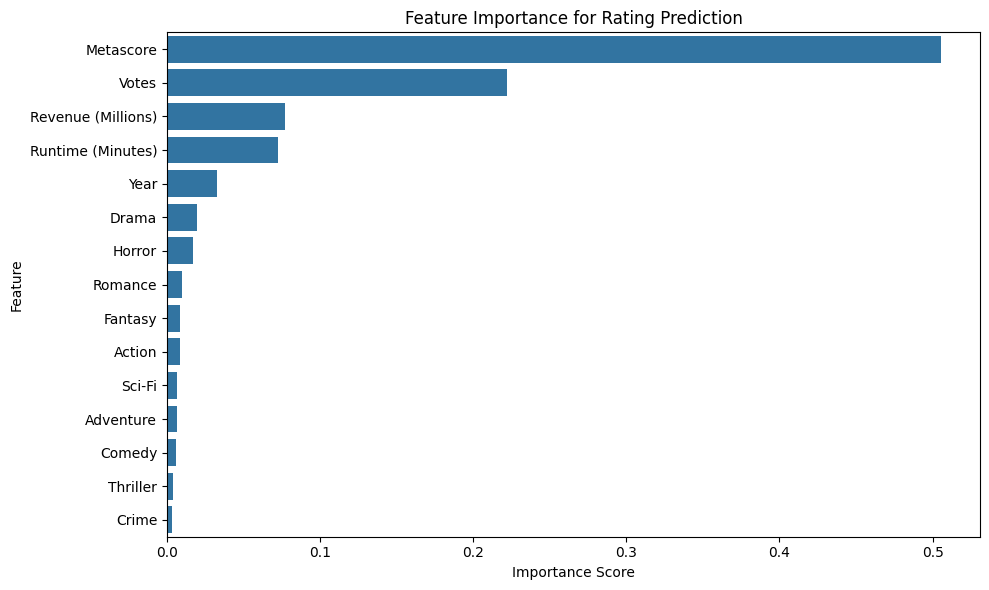

In [74]:
# --- 4. Feature Importance Plot ---
feature_importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance for Rating Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png')
print("Feature importance plot saved as 'feature_importance.png'")